# MF6 Project Problem Statement

A 300-ft thick aquifer is used for water supply.  The aquifer is also under consideration as a disposal field for treated waste water (aquifer-storage-recovery), where the filtration and dilution capacity of the aquifer will be used to receive the waste water for intentional re-use.

The figure below is a plan-view representation of a conceptual model of the aquifer. Each cell in the schematic is $1,500$ feet by $1,500$ feet.

![](aquiferplan.png)

The northern constant head boundary is set at h=600 ft. The southern edge constant boundary varies from 540 ft to 520 ft as one traverses from east to west.  Three water supply wells, W-1, W-2, and W-3 are already in service.  Hydrologic data suggests that the aquifer system has three distinct zones with different hydraulic characteristics.  These characteristics are tabulated below.

|Zone|K(cm/sec)|$n$|
|---|---:|---:|
|1|4.72|0.20|
|2|1.57|0.20|
|3|0.47|0.20|

The longitudinal dispersivity has been estimated as $\alpha_l=50~m$ and the transverse dispersivity has been estimated at $\alpha_t=20~m$.  The drinking water wells supply water at the rates tabulated below. 

|Well|Q(cfs)|
|---|---:|
|W-1|16.0|
|W-2|7.0|
|W-3|7.0|

The proposed re-use scheme will inject tracer-labeled waste-water into the aquifer into any of the three injection sites, I-1, I-2, or I-3.  The goal is for the concentration of the non-toxic tracer to never exceede 250 mg/L at the water production wells.  The tracer is added just before injection as a dilution indicator so that the water utility can shut down a well if the water in that well is not sufficiently diluted (much like the tracer added to natural gas to detect leaks).  The tracer concentration at the injection point is 1000 mg/L (the operation goal is the dilute the waste water four fold before it reaches the drinking water wells).

Determine using MF6 the answers to the questions below.  

1. Can 30 cfs of waste water be injected at I-3 and meet the water quality goal (4:1 dilution at drinking water wells)?
2. Is it possible to inject more waste water (higher flow or different location)?
3. Find the maximum volume that can be injected (at any or all of the three sites) and meet the water quality goal - this is the "regulatory assimilative capacity of the system."  Does this volume exceed the drinking water demand currently satisfied by the three wells?
4. Assume that instead of a non-toxic tracer, the injection water concentration represents some particular water quality parameter.  Assuming that the injection rate never exceedes the demand rate, what is the maximum waste load (mg/sec) that can be put into the aquifer and meet the raw water quality goal?

Submit your response as a Modeling Report; below is a suggested layout for such a report

## <div style="text-align: center;"> Modeling the Assimilative Capacity of a 300-ft Aquifer for Aquifer-Storage-Recovery Applications using MODFLOW6 </div>

<div style="text-align: center;">
by Author(s)
</div>

<div style="text-align: center;">
26 Nov 21024
</div>

<div style="text-align: center;">
Department of Civil, Environmental and Construction Engineering
</div>

### Introduction: 

The 300-ft thick aquifer depicted below is to be used for water supply.  The aquifer is also under consideration as a disposal field for treated waste water (aquifer-storage-recovery), where the filtration and dilution capacity of the aquifer will be used to receive the waste water for intentional re-use.

![](aquiferplan.png)

The figure is a plan-view representation of the conceptual model of the aquifer. Each cell in the schematic is $1,500$ feet by $1,500$ feet.

The modeling **objective** is to evaluate the feasibility of injecting tracer-labeled wastewater into the aquifer without exceeding water quality goals at drinking water wells. Injection must achieve a 4:1 dilution (250 mg/L threshold) at the production wells W-1, W-2, and W-3, starting from an injection concentration of 1000 mg/L.

### Modeling Problem Statement

Evaluate injection scenarios at sites I-1, I-2, and I-3 considering:
  - Feasibility of injecting 30 cfs at I-3.
  - Potential for higher injection rates or alternative locations.
  - Maximum allowable injection volume meeting water quality goals (regulatory assimilative capacity).
  - Maximum waste load (mg/sec) at allowable injection rates.

### Assumptions and Parameters: 

Hydrologic data suggests that the aquifer system has three distinct zones with different hydraulic characteristics.  These characteristics are tabulated below.

|Zone|K(cm/sec)|$n$|
|---|---:|---:|
|1|4.72|0.20|
|2|1.57|0.20|
|3|0.47|0.20|

The northern constant head boundary is set at h=600 ft. The southern edge constant boundary varies from 540 ft to 520 ft as one traverses from east to west.  Three water supply wells, W-1, W-2, and W-3 are already in service.  
The longitudinal dispersivity has been estimated as $\alpha_l=50~m$ and the transverse dispersivity has been estimated at $\alpha_t=20~m$.

The drinking water wells supply water at the rates tabulated below. 

|Well|Q(cfs)|
|---|---:|
|W-1|16.0|
|W-2|7.0|
|W-3|7.0|
  
The proposed aquifer-storage-recovery (ASR) scheme involves injecting treated wastewater containing a tracer at an initial concentration of 1000 mg/L. The system's operational objective is to ensure that the tracer undergoes sufficient dilution within the aquifer before reaching the production wells. Specifically, the tracer concentration at the drinking water wells—W-1, W-2, and W-3—must not exceed the regulatory threshold of 250 mg/L, representing a required 4:1 dilution ratio.

This requirement ensures compliance with water quality standards and safeguards the supply of potable water. Modeling will evaluate the aquifer's dilution capacity under various injection scenarios to determine the maximum allowable injection rates while maintaining water quality at the production wells.

### Modeling Methodology

The modeling framework employs MODFLOW6 to simulate groundwater flow and a coupled mass transport solver to model tracer transport. The methodology is outlined as follows:

**Flow Calculations**
Groundwater flow is simulated using MODFLOW6, which employs a block-centered finite difference approach to approximate the governing equations of motion for flow in saturated porous media. The influence of production wells on the flow field is explicitly modeled to capture their impact on groundwater velocities and directions.

**Transport Modeling**
Tracer transport is simulated using a marker-in-cell, finite volume mass transport solver integrated with the MODFLOW6 flow grid. This solver models the key processes of advection, dispersion, and dilution, providing spatially and temporally resolved predictions of tracer concentrations throughout the aquifer.

**Dilution Criteria**
Tracer concentrations at the production wells (W-1, W-2, and W-3) are evaluated against the operational dilution criterion, ensuring that the concentration does not exceed the target threshold 

$$𝐶_{goal}=250~mg/L$$
 
This analysis determines the feasibility of proposed injection scenarios and the aquifer's capacity to meet water quality standards.

By integrating flow and transport modeling on a shared computational grid, this methodology ensures accurate representation of hydrodynamic and mass transport processes essential for decision-making in aquifer storage and recovery operations.

### Modeling Workflow

The modeling workflow is:
1. Initial package set-up (Python package loading -- assume packages already installed in the kernel)
2. Read model structure data (I named the file "pr2-input-base.txt", you can rename as needed)
3. Read hydraulic conductivity array  
4. Read boundary array
5. Read idomain array
6. Read storativity array
7. Read porosity array
8. Read/generate wells (once per stress period)

The process above is repeated for eacxh scenario, the details are in the appendices below.

5. Results:

- Scenario 1: Injection of 30 cfs at I-3. Tracer concentration at wells: <br> W-1: $15~mg/L$ <br> W-2: $153~mg/L$  <br> W-3:$328~mg/L$ ; <br> Evaluation: 30 cfs injection at I-3 does not5 meet the stated dilution goal].
  
- Scenario 2: Reduce rate at I3 and increase at I1 and I2; total injection is 30 cfs. Injection rate: [Maximum rate feasible for each site, I-1, I-2, I-3]. Evaluation: [State if higher injection rates meet the goal].
  
- Scenario 3: Regulatory Assimilative Capacity. Maximum injection volume: [Calculated capacity in cfs or m³/s]. Comparison to well demand: [State if capacity exceeds current drinking water demand].
  - Scenario 4: Maximum Waste Load. Maximum injection rate: [Rate that satisfies water demand]. Waste load: [Calculated maximum mg/secmg/sec].

6. Discussion
  - Feasibility: Summarize the feasibility of injection scenarios.
  - Sensitivity Analysis: Discuss key parameters affecting the results (e.g., dispersivity, porosity).
  - Limitations: Highlight assumptions that could impact accuracy.

7. Recommendations
  - Proposed injection site(s) and rates.
  - Monitoring strategies to ensure compliance with water quality goals.
  - Consideration of alternative aquifer management strategies if goals cannot be met.

8. Conclusions
  - Summarize findings, including the maximum allowable injection volume and waste load.

9. Appendices
  - Appendix A: Detailed calculations (flow modeling, dilution ratios).
  - Appendix B: Maps/visualizations of flow and tracer concentration.
  - Appendix C: Tables of input parameters and results.

<!--

0. **Front matter**:

> Title Page: Title of the Report
    Author(s)
    Date
    Affiliation/Institution

> Table of Contents: List of Sections and Subsections with Page Numbers

> List of Figures and Tables: Numbered List of Figures and Tables with Captions and Page Numbers

> Executive Summary: A concise summary of the main objectives, methodology, key findings, and recommendations. This section should provide a quick overview of the report's main points.

1. **Introduction**: Background and context of the groundwater modeling study Objectives and goals of the modeling project. Scope and limitations of the study.

2. **Literature Review**: Review of relevant literature and prior research on the study area, hydrogeology, and similar modeling studies. Explanation of key concepts and theories related to groundwater modeling.

3. **Study Area and Data Collection**: Description of the study area, including its geographical location and hydrogeological characteristics. Details on data collection methods, sources, and types of data used (e.g., well data, geophysical data, hydrological data).

4. **Conceptual Model**: Development of the conceptual model, including hydrogeological setting, boundary conditions, and initial conditions. Explanation of the conceptual model's assumptions and simplifications.

5. **Numerical Modeling Approach**: Explanation of the numerical modeling software and methodology used. Description of the mathematical equations governing groundwater flow, solute transport, or any relevant processes.

6. **Model Calibration** *(not enough detail is provided in problem statement, so feel free to skip entirely)*: Details on the calibration process, including parameter estimation and model adjustments to match observed data. Presentation of calibration results and goodness-of-fit statistics.

7. **Model Validation** *(not enough detail is provided in problem statement, so feel free to skip entirely)*: Presentation of validation results to demonstrate the model's accuracy and reliability. Discussion of how well the model reproduces observed groundwater behavior.

8. **Scenario Analysis**: Presentation of model simulations for different scenarios, including various input conditions and potential changes in the study area. Discussion of the implications of different scenarios on groundwater behavior.

9. **Results and Discussion**: Detailed presentation of modeling results, including maps, graphs, and tables. Interpretation of the results in the context of the study's objectives. Discussion of any trends, anomalies, or significant findings.

10. **Conclusions**: Summary of the key findings and their implications. Discussion of the study's contributions to the field and its relevance to decision-making.

11. **Recommendations**: Specific recommendations for groundwater management, remediation, or further research based on the modeling results.

12. **References**: List of all sources and literature cited in the report, following a standard citation style.

13. **Appendices**: Supplementary material such as data tables, model input files, detailed modeling parameters, and additional figures.

Remember to use clear and concise language throughout the report, and include appropriate figures, tables, and citations to support your findings and analysis. Additionally, make sure the report is well-organized and follows a logical flow of information from introduction to conclusions. -->

# Appendix I: Scenario 1

Inputs: Injection of 30 cfs at I-3. 
Outputs: Tracer concentration at wells: W-1: [Concentration] mg/L ;W-2: [Concentration] mg/L; W-3: [Concentration] mg/L

In [136]:
%reset -f

In [137]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

:::{note}
The script generates a lot of output that are suppressed by a `;`  Comment the character out to re-enable full output (which is damn helpful for debugging the script!)
:::

## Initial setup

Import dependencies, define the example name and workspace, and read settings from environment variables.

In [138]:
import os
import pathlib as pl
from pprint import pformat
import flopy
import git
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from flopy.plot.styles import styles
from modflow_devtools.misc import get_env, timed
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

:::{note}
The code block above loads various modules into the environment; they must exist and be loaded into the kernel - if not you get a warning "Module Not Found" and will have to install into the kernel (i.e. `pip -m install module`, or the `conda` equivalent
Filter warnings repeated to achieve "for sure ..." that the filter is applied.  By design the filter will not stop ERRORS, and warnings issued within functions will still display, but it will address one annoying deprecation error.
:::

### Define parameters

Define model units, spatial, and temporal discritization settings.

In [139]:
# Read control file
filename = "pr2-input-base.txt"
# Read the file
afile = open(filename,"r")  # connect and read file for base input
lines = []
for line in afile:
    lines.append(line.rstrip('\n'))
afile.close()
# Assign Properties
length_units= lines[0]
time_units= lines[1]
nlay = int(lines[2])  # Number of layers
nrow = int(lines[3])  # Number of rows
ncol = int(lines[4])  # Number of columns
delr = float(lines[5])  # Column width ($m$)
delc = float(lines[6])  # Row width ($m$)
delz = float(lines[7])  # Layer thickness ($m$)
top  = float(lines[8])  # Top of the model ($m$)

#

# more above

### Read Hydraulic Conductivity

Read the hydraulic conductivity array (float) arranged in layer,row, column format.  Read one times per model.

In [140]:
# Read hydraulic conductivity array
filename = "pr2-input-hydcond.txt"
hk = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        hk.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
hk = np.array(hk)

### Read Boundary Array

Read the boundary indication array (integer) arranged in layer,row, column format.  Read one times per model.

In [141]:
# Read boundary array
filename = "pr2-input-ibound.txt"
ibound = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ibound.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ibound = np.array(ibound)

### Read Computation Domain Array

Read the computation domain array (integer) indicating active/inactive cells arranged in layer,row, column format.  Read one times per model.

In [142]:
# Read idomain array
filename = "pr2-input-idomain.txt"
idomain = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        idomain.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
idomain = np.array(idomain)

# Render the array into a visual representation - will repeat this code block as needed
import matplotlib.pyplot as plt
import numpy as np

# Example 2D array (you would replace this with your actual data)
# Assuming my_array2D is your 2D array (nrow x ncol)
my_array2D = idomain  # Replace with your actual array

# Plot the 2D array using imshow
plt.figure(figsize=(14, 10))  # Optional: set the figure size
plt.imshow(my_array2D, cmap='viridis', interpolation='none')

# Add a colorbar to indicate the value scale
plt.colorbar(label='Array Value')
# Add the grid
plt.grid(visible=True, color='black', linestyle='-', linewidth=0.1)
# Customize the grid to align with the image cells
plt.gca().set_xticks(np.arange(-0.5, my_array2D.shape[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, my_array2D.shape[0], 1), minor=True)
# Enable minor ticks to show the grid at each cell
plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=1.5)
# Disable the default major ticks
plt.gca().tick_params(which='major', bottom=False, left=False)
# Add row and column labels
rows, cols = my_array2D.shape
plt.xticks(np.arange(cols), labels=[f'Col {i}' for i in range(cols)])
plt.yticks(np.arange(rows), labels=[f'Row {i}' for i in range(rows)])

# Optional: Add labels for clarity
plt.title('2D Array Visualization for array: idomain')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Display the plot
plt.show()

### Read storage array

Read the storage coefficient array (float) arranged in layer,row, column format.  Read one times per model.

In [143]:
# Read storativity array
filename = "pr2-input-storage.txt"
ss_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ss_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ss_array = np.array(ss_array)

### Read porosity array

Read theporosity array (float) arranged in layer, row, column format.  Read one times per model.

In [144]:
# Read porosity array
filename = "pr2-input-porosity.txt"
pors_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        pors_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
pors_array = np.array(pors_array)

### Read longitudinal dispersivity array

Read the longitudinal dispersivity array (float) arranged in layer, row, column format.  Read one times per model.

In [145]:
# Read longitudinal dispersivity array
filename = "pr2-input-disperl.txt"
displ_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        displ_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
displ_array = np.array(displ_array)

### Read transverse dispersivity array 

Read the transverse dispersivity array (float) arranged in layer, row, column format.  Read one times per model.

In [146]:
# Read dispersivity in y-direction array
filename = "pr2-input-dispert.txt"
dispt_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        dispt_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
dispt_array = np.array(dispt_array)

In [147]:
# Read initial heads array
filename = "pr2-input-headinit.txt"
strt = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        strt.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
strt = np.array(strt)

strt

array([[9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 ,
        9999.99 , 9999.99 , 9999.99 , 9999.99 ],
       [9999.99 ,  600.   ,  600.   ,  600.   ,  600.   ,  600.   ,
         600.   ,  600.   ,  600.   , 9999.99 ],
       [9999.99 ,  598.627,  598.635,  598.651,  598.671,  598.685,
         598.696,  598.698,  598.699, 9999.99 ],
       [9999.99 ,  597.244,  597.263,  597.299,  597.347,  597.373,
         597.4  ,  597.399,  597.398, 9999.99 ],
       [9999.99 ,  595.844,  595.873,  595.935,  596.046,  596.058,
         596.134,  596.1  ,  596.095, 9999.99 ],
       [9999.99 ,  592.981,  593.023,  593.102,  593.21 ,  593.295,
         593.388,  593.439,  593.477, 9999.99 ],
       [9999.99 ,  588.644,  588.707,  588.823,  588.976,  589.14 ,
         589.307,  589.46 ,  589.587, 9999.99 ],
       [9999.99 ,  584.245,  584.338,  584.507,  584.73 ,  584.981,
         585.242,  585.506,  585.823, 9999.99 ],
       [9999.99 ,  579.753,  579.891,  580.139,  580.457,  580.8

In [148]:
0.01548

0.01548

### Pumping and Injection Wells

Define wellfield settings, here we are using scripting to build the input structure, bou could just as well use a file read structure.

In [149]:
# Wellfield Conditions
# MF2K5 pumping/injection rates in length-time units
# CFS pumping is negative
qW1 = -16.0 
qW2 =  -7.0
qW3 =  -7.0
# CFS injection is positive
qI1 = 0.0 
qI2 = 0.0
qI3 = 30.0
# Concentrations 
# PPM pumping (set pumpings to zero value)
cW1 = 0.0
cW2 = 0.0
cW3 = 0.0
# PPM injection
cI1 = 00.0
cI2 = 00.0
cI3 = 1000.0
#spd = {
 #   0: [[0, 3, 6, cwell1, 2], [0, 10, 6, cwell0, 2]],
  #  1: [[0, 3, 6, cwell0, 2], [0, 10, 6, cwell0, 2]],
#}  # Well info 4 MT3D
# Build MF6 wellfield objects
wellist_sp1 = []
#                   (k,  i, j),   flow,  conc
wellist_sp1.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp1.append([(0, 4, 6), qI1, cI2])  # Injection well
wellist_sp1.append([(0, 7, 8), qI1, cI3])  # Injection well #3  ACTIVE THIS SCENARIO
wellist_sp1.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp1.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp1.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
wellist_sp2 = []
#                   (k,  i, j),   flow,  conc
wellist_sp2.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp2.append([(0, 4, 6), qI2, cI2])  # Injection well
wellist_sp2.append([(0, 7, 8), qI3, cI3])  # Injection well  #3  ACTIVE THIS SCENARIO
wellist_sp2.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp2.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
spd_mf6 = {0: wellist_sp1, 1: wellist_sp2}

### Define parameters

Define model units, spatial, and temporal discritization settings.

In [150]:
# Model units
#length_units = "meters"
#time_units = "seconds"

# Model parameters
#nlay = 1  # Number of layers
#nrow = 18  # Number of rows
#ncol = 14  # Number of columns
#delr = 100.0  # Column width ($m$)
#delc = 100.0  # Row width ($m$)
#delz = 10.0  # Layer thickness ($m$)
#top = 0.0  # Top of the model ($m$)
#prsity = 0.3  # Porosity - array reader above
k1 = 1.474e-4  # Horiz. hyd. conductivity of medium grain material ($m/sec$)
k2 = 1.474e-7  # Horiz. hyd. conductivity of fine grain material ($m/sec$)
inj = 0.001  # Injection well rate ($m^3/sec$)
ext = -0.0189  # Extraction well pumping rate ($m^3/sec$)
al = 20.0  # Longitudinal dispersivity ($m$)
trpt = 0.2  # Ratio of horiz. transverse to longitudinal dispersivity ($m$)
perlen = 2.0  # Simulation time ($years$)

# Additional model input
#hk = k1 * np.ones((nlay, nrow, ncol), dtype=float)
#hk[:, 5:8, 1:8] = k2
laytyp = icelltype = 0

# Active model domain
#ibound = np.ones((nlay, nrow, ncol), dtype=int)
#ibound[0, 0, :] = -1
#ibound[0, -1, :] = -1
#idomain = np.ones((nlay, nrow, ncol), dtype=int)
icbund = 1

# Boundary conditions

# Transport related
sconc = 0.0
ath1 = al * trpt
dmcoef = 0.0  # m^2/s
# Time variables
perlen = [365.0 * 86400, 365.0 * 86400]
steady = [False, False]
nper = len(perlen)
nstp = [365, 365]
tsmult = [1.0, 1.0]
#
sconc = 0.0
c0 = 0.0
botm = [top - delz]
mixelm = -1

# Solver settings
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0
percel = 1.0  # HMOC parameters
itrack = 2
wd = 0.5
dceps = 1.0e-5
nplane = 0
npl = 0
nph = 16
npmin = 2
npmax = 32
dchmoc = 1.0e-3
nlsink = nplane
npsink = nph
nadvfd = 1

## Model setup

Define functions to build models, write input files, and run the simulation.

**Groundwater Flow Package Build**

In [151]:
# Workspace and Executibles
binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6-pr2" # location on MY computer to store files this example (directory must already exist)
#workarea = workspace # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name(s)
name = "mf6-pr2"
gwfname = "gwf-" + name
gwtname = "gwt-" + name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name="sim-" + name, exe_name=binary, version="mf6", sim_ws=workarea
)
####### CREATED "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mt3d_example9"

In [152]:
####### Instantiating MODFLOW 6 time discretization ########
tdis_rc = []
for i in range(nper):
    tdis_rc.append((perlen[i], nstp[i], tsmult[i]))
flopy.mf6.ModflowTdis(sim, nper=nper, perioddata=tdis_rc, time_units=time_units);
## delete ";" in above line at end to show full output

In [153]:
####### Instantiating MODFLOW 6 groundwater flow model ########
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(gwfname)
# create MODFLOW6 flow model framework
gwf = flopy.mf6.ModflowGwf(sim, modelname=gwfname, save_flows=True, model_nam_file=model_nam_file);
## delete ";" in above line at end to show full output

In [154]:
###### Instantiating MODFLOW 6 solver for flow model #######
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html
imsgwf = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="CG",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwfname}.ims",
    )
sim.register_ims_package(imsgwf, [gwf.name]);
## delete ";" in above line at end to show full output

In [155]:
###### Instantiating MODFLOW 6 discretization package ######
flopy.mf6.ModflowGwfdis(
    gwf,
    length_units=length_units,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwfname}.dis",
    );
## delete ";" in above line at end to show full output

In [156]:
# Build MF6 constant head boundaries:
xc = gwf.modelgrid.xcellcenters
chdspd = []
# Loop through the top & bottom sides.
for j in range(1,ncol-1):
#for j in np.arange(ncol):
#               l,  r, c,  head, conc
    chdspd.append([(0, 1, j), 600.0, 0.0])  # Top boundary
    hd = 520.0 + (xc[-1, j] - xc[-1, 1]) * 2.8572 / 1500
    chdspd.append([(0, 12, j), round(hd,1), 0.0])  # Bottom boundary
chdspd = {0: chdspd}

In [157]:
###### Instantiating MODFLOW 6 initial conditions package for flow model #######
flopy.mf6.ModflowGwfic(gwf, strt=strt, filename=f"{gwfname}.ic");
## delete ";" in above line at end to show full output

In [158]:
# Instantiating MODFLOW 6 node-property flow package
flopy.mf6.ModflowGwfnpf(
    gwf,
    save_flows=False,
    icelltype=icelltype,
    k=hk,
    k33=hk,
    save_specific_discharge=True,
    filename=f"{gwfname}.npf",
    );
## delete ";" in above line at end to show full output

In [159]:
# Define the Storage package (sto) with the ss array
#sto = flopy.mf6.ModflowGwfsto(gwf, ss=1.0e-05)
sto = flopy.mf6.ModflowGwfsto(gwf, ss=ss_array);
## delete ";" in above line at end to show full output

In [160]:
# Instantiating MODFLOW 6 constant head package

flopy.mf6.ModflowGwfchd(
    gwf,
    maxbound=len(chdspd),
    stress_period_data=chdspd,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="CHD-1",
    filename=f"{gwfname}.chd",
    );
## delete ";" in above line at end to show full output

In [161]:
# Instantiate the wel package
flopy.mf6.ModflowGwfwel(
    gwf,
    print_input=True,
    print_flows=True,
    stress_period_data=spd_mf6,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="WEL-1",
    filename=f"{gwfname}.wel",
    );
## delete ";" in above line at end to show full output

In [162]:
# Instantiating MODFLOW 6 output control package for flow model
flopy.mf6.ModflowGwfoc(
    gwf,
    head_filerecord=f"{gwfname}.hds",
    budget_filerecord=f"{gwfname}.bud",
    headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    );
## delete ";" in above line at end to show full output



**Transport Package Building**

In [163]:
###### Instantiating MODFLOW 6 groundwater transport package ##########
gwtname = "gwt-" + name
gwt = flopy.mf6.MFModel(
    sim,
    model_type="gwt6",
    modelname=gwtname,
    model_nam_file=f"{gwtname}.nam",
    )#;
## delete ";" in above line at end to show full output
gwt.name_file.save_flows = True

In [164]:
# create iterative model solution and register the gwt model with it
imsgwt = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="BICGSTAB",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwtname}.ims",
    )
sim.register_ims_package(imsgwt, [gwt.name]);
## delete ";" in above line at end to show full output

In [165]:
###### Instantiating MODFLOW 6 transport discretization package #####
flopy.mf6.ModflowGwtdis(
    gwt,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwtname}.dis",
    );
## delete ";" in above line at end to show full output

In [166]:
# Instantiating MODFLOW 6 transport initial concentrations
flopy.mf6.ModflowGwtic(gwt, strt=sconc, filename=f"{gwtname}.ic");
## delete ";" in above line at end to show full output

In [167]:
# Instantiating MODFLOW 6 transport advection package
if mixelm >= 0:
    scheme = "UPSTREAM"
elif mixelm == -1:
    scheme = "TVD"
else:
    raise Exception()
flopy.mf6.ModflowGwtadv(gwt, scheme=scheme, filename=f"{gwtname}.adv");
## delete ";" in above line at end to show full output

In [168]:
# Instantiating MODFLOW 6 transport dispersion package
if al != 0:
    flopy.mf6.ModflowGwtdsp(
        gwt,
        #alh=al, # longitudinal
        alh = displ_array,
        #ath1=ath1, # transverse
        ath1 = dispt_array,
        filename=f"{gwtname}.dsp",
        );
## delete ";" in above line at end to show full output

In [169]:
# Instantiating MODFLOW 6 transport mass storage package
flopy.mf6.ModflowGwtmst(
    gwt,
    porosity=pors_array,
##    porosity=prsity,
    first_order_decay=False,
    decay=None,
    decay_sorbed=None,
    sorption=None,
    bulk_density=None,
    distcoef=None,
    filename=f"{gwtname}.mst",
    );
## delete ";" in above line at end to show full output

In [170]:
# Instantiating MODFLOW 6 transport source-sink mixing package
sourcerecarray = [
    ("WEL-1", "AUX", "CONCENTRATION"),
    ("CHD-1", "AUX", "CONCENTRATION"),
    ]
flopy.mf6.ModflowGwtssm(
    gwt,
    sources=sourcerecarray,
    print_flows=True,
    filename=f"{gwtname}.ssm",
    );
## delete ";" in above line at end to show full output

In [171]:
# Instantiating MODFLOW 6 transport output control package
flopy.mf6.ModflowGwtoc(
    gwt,
    budget_filerecord=f"{gwtname}.cbc",
    concentration_filerecord=f"{gwtname}.ucn",
    concentrationprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    filename=f"{gwtname}.oc",
    );
## delete ";" in above line at end to show full output

In [172]:
# Instantiating MODFLOW 6 flow-transport exchange mechanism
flopy.mf6.ModflowGwfgwt(
    sim,
    exgtype="GWF6-GWT6",
    exgmnamea=gwfname,
    exgmnameb=gwtname,
    filename=f"{name}.gwfgwt",
    );
## delete ";" in above line at end to show full output

**Generate the Files**

In [173]:
sim.write_simulation(silent=True)

**Running the Model** 

In [174]:
#success, buff = sim.run_simulation(silent=False, report=True)#Verbose output
success, buff = sim.run_simulation(silent=True, report=True)#Suppress output
assert success, pformat(buff)

### Plotting results

Plotting model results.

:::{note}
A lot of reverse engineering to produce plots; am positive this is not the best way to make the plots, but was using the original example link as a go-by.
:::

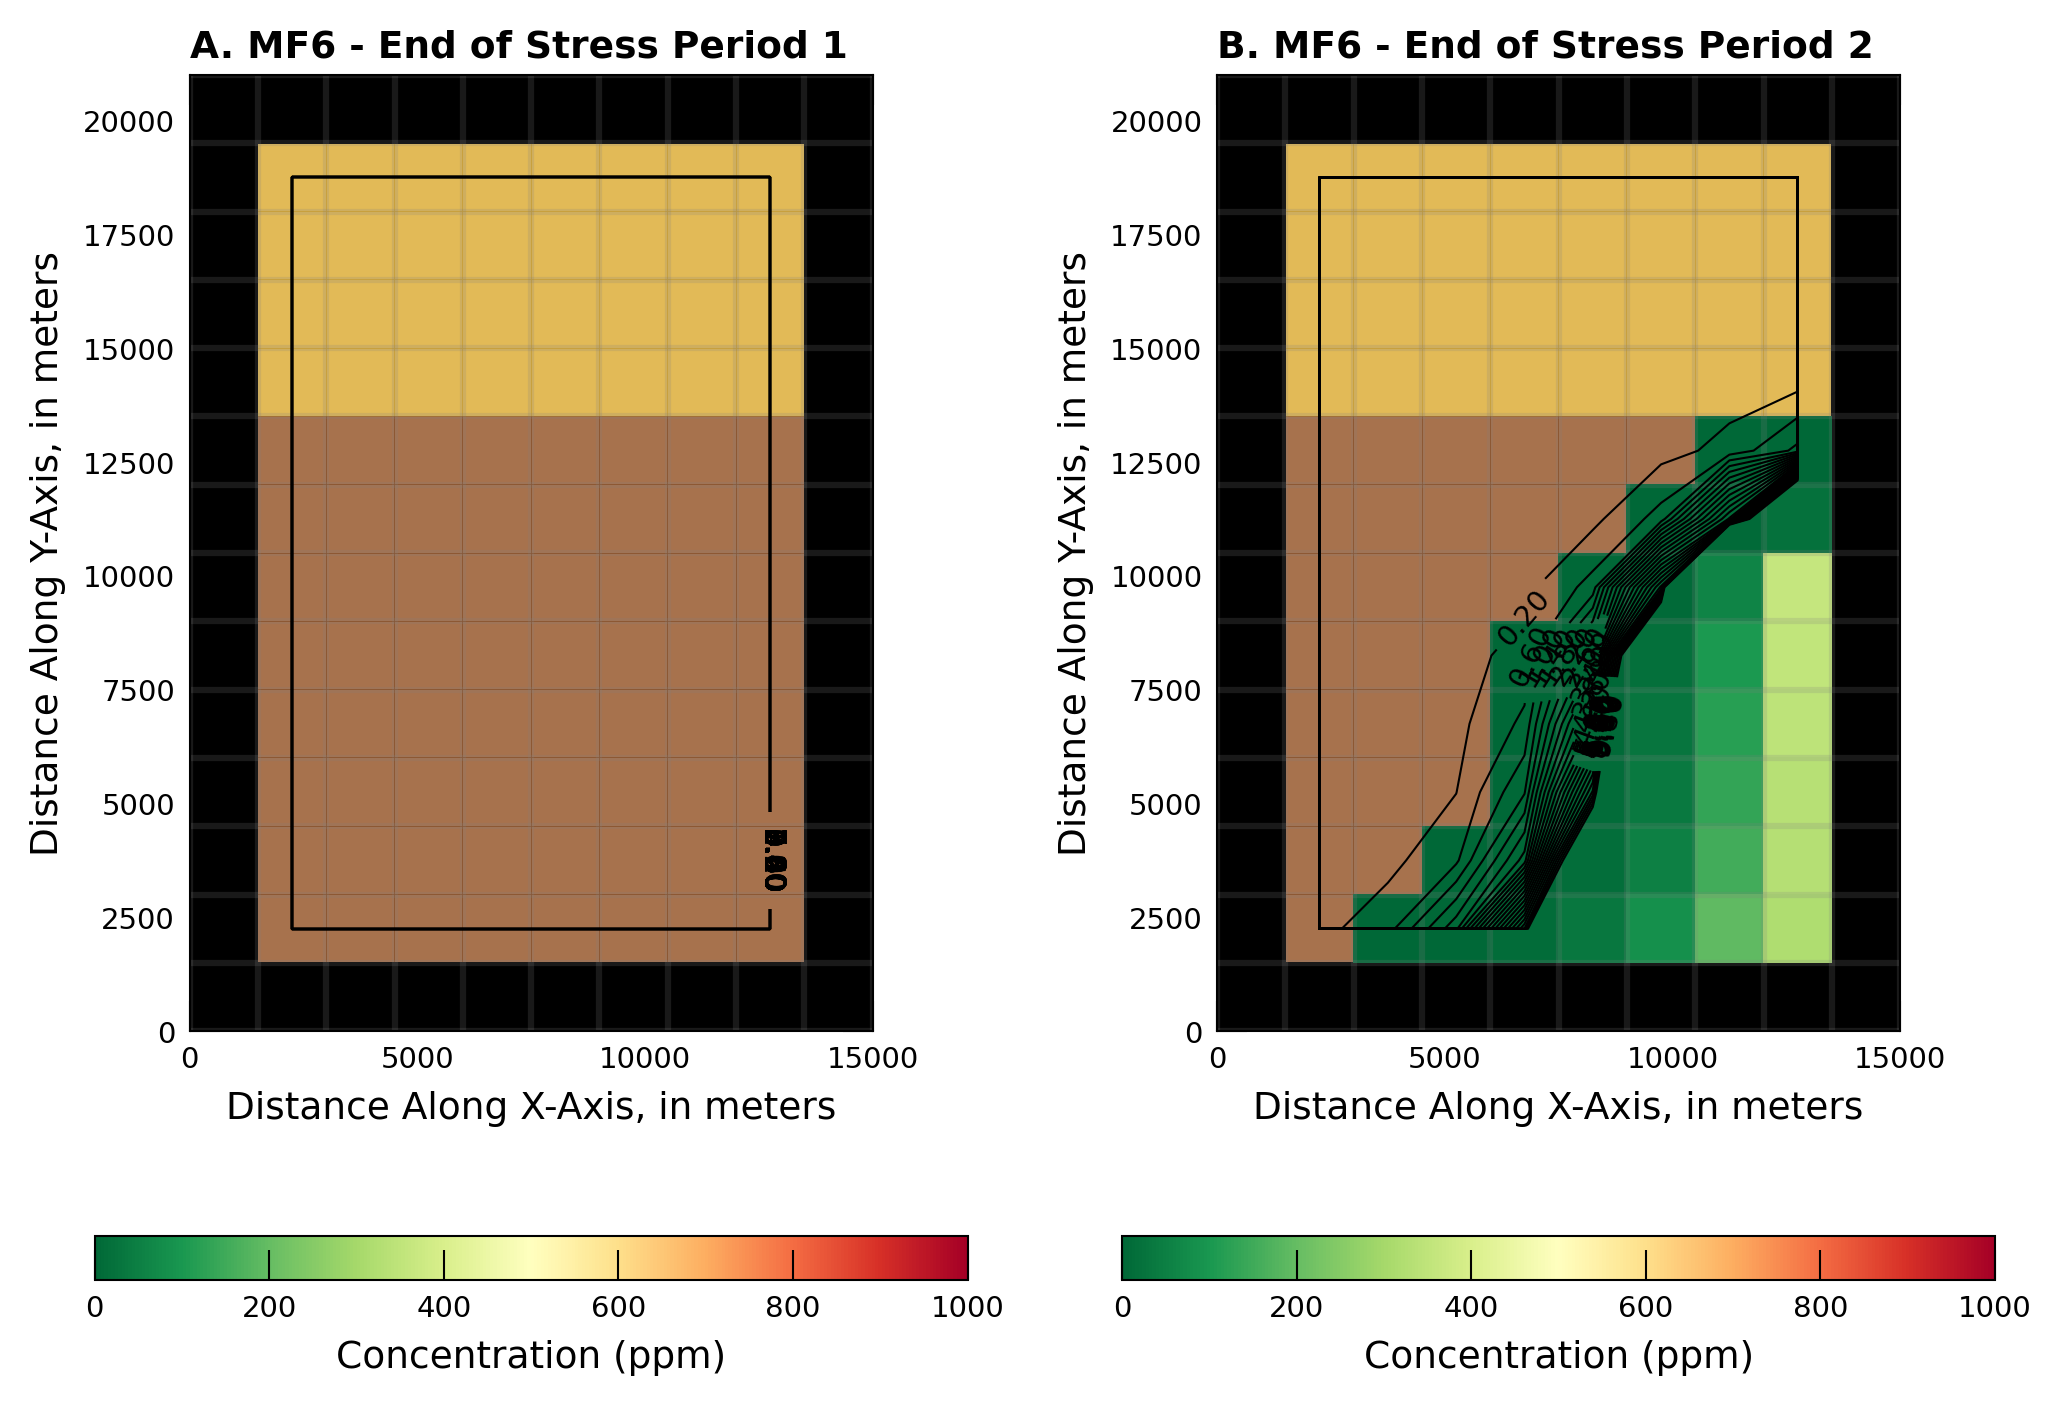

In [175]:
import copy
import matplotlib as mpl
# Figure properties
figure_size = (7, 5)
# Get the MF6 concentration output
gwt = sim.get_model(list(sim.model_names)[1])
ucnobj_mf6 = gwt.output.concentration()
conc_mf6 = ucnobj_mf6.get_alldata()


# Create figure for scenario
with styles.USGSPlot() as fs:
    sim_name = sim.name
    plt.rcParams["lines.dashed_pattern"] = [5.0, 5.0]
    levels = np.arange(0.2, 10, 0.4)
    stp_idx = 0  # 0-based (out of 2 possible stress periods)
# Plot after 8 years
    axWasNone = False
#    if ax is None:
    fig = plt.figure(figsize=figure_size, dpi=300, tight_layout=True)
    axWasNone = True
    ax = fig.add_subplot(1, 2, 1, aspect="equal")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0],  alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 0
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)
    
# second stress period
    stp_idx = 1  # 0-based (out of 2 possible stress periods)
    if axWasNone:
        ax = fig.add_subplot(1, 2, 2, aspect="equal",label = "subplot2")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0], alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 1
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)

In the figures above, the brown rectangle contained within the goldenrod rectangle represent two different horizontal hydraulic conductivities. The goldenrod color represents the conductivity of a medium grain material, $K_1 = 1.474\times 10^{-4}~\frac{m}{sec}$. The brown color represents theconductivity of a fine grain material, $K_2 = 1.474 \times 10^{-7}~\frac{m}{sec}$.

The plume "color map" is overlain on the material property map, and is set to opaque (not transparent).  The color ramp is and inverted GreenYellowRed.  High values render as red, lowest as green.

Extract concentrations for a specific location, first learn about the array

In [176]:
print("Shape:", conc_mf6.shape)  # (rows, columns, depth, etc.)
print("Data type:", conc_mf6.dtype)
print("Number of dimensions:", conc_mf6.ndim)

Shape: (2, 1, 14, 10)
Data type: float64
Number of dimensions: 4


My guess is there are two time components (dim0), 1 layer (dim1), and 14 rows (dim2), and 10 columns (dim3).

In [177]:
print("W1 Conc SP1",round(conc_mf6[0][0][11][5],3))
print("W1 Conc SP2",round(conc_mf6[1][0][11][5],3))
print("W2 Conc SP1",round(conc_mf6[0][0][11][7],3))
print("W2 Conc SP2",round(conc_mf6[1][0][11][7],3))
print("W3 Conc SP1",round(conc_mf6[0][0][11][8],3))
print("W3 Conc SP2",round(conc_mf6[1][0][11][8],3))

#print("I1 Conc SP1",round(conc_mf6[0][0][4][4],3))
#print("I1 Conc SP2",round(conc_mf6[1][0][4][4],3))
#print("I2 Conc SP1",round(conc_mf6[0][0][4][6],3))
#print("I2 Conc SP2",round(conc_mf6[1][0][4][6],3))
#print("I3 Conc SP1",round(conc_mf6[0][0][7][8],3))
#print("I3 Conc SP2",round(conc_mf6[1][0][7][8],3))
#$(0, 11, 5), qW1, cW1])  # Pumping well
#wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
#wellist_sp2.append([(0, 11, 8)

W1 Conc SP1 0.0
W1 Conc SP2 15.247
W2 Conc SP1 0.0
W2 Conc SP2 153.983
W3 Conc SP1 0.0
W3 Conc SP2 328.63


# Appendix I: Scenario 2

Inputs: Injection of 20 cfs at I-3, 10 cfs at I-1. 
Outputs: Tracer concentration at wells: W-1: [Concentration] mg/L ;W-2: [Concentration] mg/L; W-3: [Concentration] mg/L

In [178]:
%reset -f

In [179]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

:::{note}
The script generates a lot of output that are suppressed by a `;`  Comment the character out to re-enable full output (which is damn helpful for debugging the script!)
:::

## Initial setup

Import dependencies, define the example name and workspace, and read settings from environment variables.

In [180]:
import os
import pathlib as pl
from pprint import pformat
import flopy
import git
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from flopy.plot.styles import styles
from modflow_devtools.misc import get_env, timed
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

:::{note}
The code block above loads various modules into the environment; they must exist and be loaded into the kernel - if not you get a warning "Module Not Found" and will have to install into the kernel (i.e. `pip -m install module`, or the `conda` equivalent
Filter warnings repeated to achieve "for sure ..." that the filter is applied.  By design the filter will not stop ERRORS, and warnings issued within functions will still display, but it will address one annoying deprecation error.
:::

### Define parameters

Define model units, spatial, and temporal discritization settings.

In [181]:
# Read control file
filename = "pr2-input-base.txt"
# Read the file
afile = open(filename,"r")  # connect and read file for base input
lines = []
for line in afile:
    lines.append(line.rstrip('\n'))
afile.close()
# Assign Properties
length_units= lines[0]
time_units= lines[1]
nlay = int(lines[2])  # Number of layers
nrow = int(lines[3])  # Number of rows
ncol = int(lines[4])  # Number of columns
delr = float(lines[5])  # Column width ($m$)
delc = float(lines[6])  # Row width ($m$)
delz = float(lines[7])  # Layer thickness ($m$)
top  = float(lines[8])  # Top of the model ($m$)

#

# more above

### Read Hydraulic Conductivity

Read the hydraulic conductivity array (float) arranged in layer,row, column format.  Read one times per model.

In [182]:
# Read hydraulic conductivity array
filename = "pr2-input-hydcond.txt"
hk = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        hk.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
hk = np.array(hk)

### Read Boundary Array

Read the boundary indication array (integer) arranged in layer,row, column format.  Read one times per model.

In [183]:
# Read boundary array
filename = "pr2-input-ibound.txt"
ibound = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ibound.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ibound = np.array(ibound)

### Read Computation Domain Array

Read the computation domain array (integer) indicating active/inactive cells arranged in layer,row, column format.  Read one times per model.

In [184]:
# Read idomain array
filename = "pr2-input-idomain.txt"
idomain = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        idomain.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
idomain = np.array(idomain)

# Render the array into a visual representation - will repeat this code block as needed
import matplotlib.pyplot as plt
import numpy as np

# Example 2D array (you would replace this with your actual data)
# Assuming my_array2D is your 2D array (nrow x ncol)
my_array2D = idomain  # Replace with your actual array

# Plot the 2D array using imshow
plt.figure(figsize=(14, 10))  # Optional: set the figure size
plt.imshow(my_array2D, cmap='viridis', interpolation='none')

# Add a colorbar to indicate the value scale
plt.colorbar(label='Array Value')
# Add the grid
plt.grid(visible=True, color='black', linestyle='-', linewidth=0.1)
# Customize the grid to align with the image cells
plt.gca().set_xticks(np.arange(-0.5, my_array2D.shape[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, my_array2D.shape[0], 1), minor=True)
# Enable minor ticks to show the grid at each cell
plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=1.5)
# Disable the default major ticks
plt.gca().tick_params(which='major', bottom=False, left=False)
# Add row and column labels
rows, cols = my_array2D.shape
plt.xticks(np.arange(cols), labels=[f'Col {i}' for i in range(cols)])
plt.yticks(np.arange(rows), labels=[f'Row {i}' for i in range(rows)])

# Optional: Add labels for clarity
plt.title('2D Array Visualization for array: idomain')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Display the plot
plt.show()

### Read storage array

Read the storage coefficient array (float) arranged in layer,row, column format.  Read one times per model.

In [185]:
# Read storativity array
filename = "pr2-input-storage.txt"
ss_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ss_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ss_array = np.array(ss_array)

### Read porosity array

Read theporosity array (float) arranged in layer, row, column format.  Read one times per model.

In [186]:
# Read porosity array
filename = "pr2-input-porosity.txt"
pors_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        pors_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
pors_array = np.array(pors_array)

### Read longitudinal dispersivity array

Read the longitudinal dispersivity array (float) arranged in layer, row, column format.  Read one times per model.

In [187]:
# Read longitudinal dispersivity array
filename = "pr2-input-disperl.txt"
displ_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        displ_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
displ_array = np.array(displ_array)

### Read transverse dispersivity array 

Read the transverse dispersivity array (float) arranged in layer, row, column format.  Read one times per model.

In [188]:
# Read dispersivity in y-direction array
filename = "pr2-input-dispert.txt"
dispt_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        dispt_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
dispt_array = np.array(dispt_array)

In [189]:
# Read initial heads array
filename = "pr2-input-headinit.txt"
strt = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        strt.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
strt = np.array(strt)

strt

array([[9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 ,
        9999.99 , 9999.99 , 9999.99 , 9999.99 ],
       [9999.99 ,  600.   ,  600.   ,  600.   ,  600.   ,  600.   ,
         600.   ,  600.   ,  600.   , 9999.99 ],
       [9999.99 ,  598.627,  598.635,  598.651,  598.671,  598.685,
         598.696,  598.698,  598.699, 9999.99 ],
       [9999.99 ,  597.244,  597.263,  597.299,  597.347,  597.373,
         597.4  ,  597.399,  597.398, 9999.99 ],
       [9999.99 ,  595.844,  595.873,  595.935,  596.046,  596.058,
         596.134,  596.1  ,  596.095, 9999.99 ],
       [9999.99 ,  592.981,  593.023,  593.102,  593.21 ,  593.295,
         593.388,  593.439,  593.477, 9999.99 ],
       [9999.99 ,  588.644,  588.707,  588.823,  588.976,  589.14 ,
         589.307,  589.46 ,  589.587, 9999.99 ],
       [9999.99 ,  584.245,  584.338,  584.507,  584.73 ,  584.981,
         585.242,  585.506,  585.823, 9999.99 ],
       [9999.99 ,  579.753,  579.891,  580.139,  580.457,  580.8

In [190]:
0.01548

0.01548

### Pumping and Injection Wells

Define wellfield settings, here we are using scripting to build the input structure, bou could just as well use a file read structure.

In [191]:
# Wellfield Conditions
# MF2K5 pumping/injection rates in length-time units
# CFS pumping is negative
qW1 = -16.0 
qW2 =  -7.0
qW3 =  -7.0
# CFS injection is positive
qI1 = 10.0 
qI2 = 0.0
qI3 = 20.0
# Concentrations 
# PPM pumping (set pumpings to zero value)
cW1 = 0.0
cW2 = 0.0
cW3 = 0.0
# PPM injection
cI1 = 1000.0
cI2 = 1000.0
cI3 = 1000.0
#spd = {
 #   0: [[0, 3, 6, cwell1, 2], [0, 10, 6, cwell0, 2]],
  #  1: [[0, 3, 6, cwell0, 2], [0, 10, 6, cwell0, 2]],
#}  # Well info 4 MT3D
# Build MF6 wellfield objects
wellist_sp1 = []
#                   (k,  i, j),   flow,  conc
wellist_sp1.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp1.append([(0, 4, 6), qI1, cI2])  # Injection well
wellist_sp1.append([(0, 7, 8), qI1, cI3])  # Injection well #3  ACTIVE THIS SCENARIO
wellist_sp1.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp1.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp1.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
wellist_sp2 = []
#                   (k,  i, j),   flow,  conc
wellist_sp2.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp2.append([(0, 4, 6), qI2, cI2])  # Injection well
wellist_sp2.append([(0, 7, 8), qI3, cI3])  # Injection well  #3  ACTIVE THIS SCENARIO
wellist_sp2.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp2.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
spd_mf6 = {0: wellist_sp1, 1: wellist_sp2}

### Define parameters

Define model units, spatial, and temporal discritization settings.

In [192]:
# Model units
#length_units = "meters"
#time_units = "seconds"

# Model parameters
#nlay = 1  # Number of layers
#nrow = 18  # Number of rows
#ncol = 14  # Number of columns
#delr = 100.0  # Column width ($m$)
#delc = 100.0  # Row width ($m$)
#delz = 10.0  # Layer thickness ($m$)
#top = 0.0  # Top of the model ($m$)
#prsity = 0.3  # Porosity - array reader above
k1 = 1.474e-4  # Horiz. hyd. conductivity of medium grain material ($m/sec$)
k2 = 1.474e-7  # Horiz. hyd. conductivity of fine grain material ($m/sec$)
inj = 0.001  # Injection well rate ($m^3/sec$)
ext = -0.0189  # Extraction well pumping rate ($m^3/sec$)
al = 20.0  # Longitudinal dispersivity ($m$)
trpt = 0.2  # Ratio of horiz. transverse to longitudinal dispersivity ($m$)
perlen = 2.0  # Simulation time ($years$)

# Additional model input
#hk = k1 * np.ones((nlay, nrow, ncol), dtype=float)
#hk[:, 5:8, 1:8] = k2
laytyp = icelltype = 0

# Active model domain
#ibound = np.ones((nlay, nrow, ncol), dtype=int)
#ibound[0, 0, :] = -1
#ibound[0, -1, :] = -1
#idomain = np.ones((nlay, nrow, ncol), dtype=int)
icbund = 1

# Boundary conditions

# Transport related
sconc = 0.0
ath1 = al * trpt
dmcoef = 0.0  # m^2/s
# Time variables
perlen = [365.0 * 86400, 365.0 * 86400]
steady = [False, False]
nper = len(perlen)
nstp = [365, 365]
tsmult = [1.0, 1.0]
#
sconc = 0.0
c0 = 0.0
botm = [top - delz]
mixelm = -1

# Solver settings
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0
percel = 1.0  # HMOC parameters
itrack = 2
wd = 0.5
dceps = 1.0e-5
nplane = 0
npl = 0
nph = 16
npmin = 2
npmax = 32
dchmoc = 1.0e-3
nlsink = nplane
npsink = nph
nadvfd = 1

## Model setup

Define functions to build models, write input files, and run the simulation.

**Groundwater Flow Package Build**

In [193]:
# Workspace and Executibles
binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6-pr2" # location on MY computer to store files this example (directory must already exist)
#workarea = workspace # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name(s)
name = "mf6-pr2"
gwfname = "gwf-" + name
gwtname = "gwt-" + name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name="sim-" + name, exe_name=binary, version="mf6", sim_ws=workarea
)
####### CREATED "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mt3d_example9"

In [194]:
####### Instantiating MODFLOW 6 time discretization ########
tdis_rc = []
for i in range(nper):
    tdis_rc.append((perlen[i], nstp[i], tsmult[i]))
flopy.mf6.ModflowTdis(sim, nper=nper, perioddata=tdis_rc, time_units=time_units);
## delete ";" in above line at end to show full output

In [195]:
####### Instantiating MODFLOW 6 groundwater flow model ########
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(gwfname)
# create MODFLOW6 flow model framework
gwf = flopy.mf6.ModflowGwf(sim, modelname=gwfname, save_flows=True, model_nam_file=model_nam_file);
## delete ";" in above line at end to show full output

In [196]:
###### Instantiating MODFLOW 6 solver for flow model #######
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html
imsgwf = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="CG",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwfname}.ims",
    )
sim.register_ims_package(imsgwf, [gwf.name]);
## delete ";" in above line at end to show full output

In [197]:
###### Instantiating MODFLOW 6 discretization package ######
flopy.mf6.ModflowGwfdis(
    gwf,
    length_units=length_units,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwfname}.dis",
    );
## delete ";" in above line at end to show full output

In [198]:
# Build MF6 constant head boundaries:
xc = gwf.modelgrid.xcellcenters
chdspd = []
# Loop through the top & bottom sides.
for j in range(1,ncol-1):
#for j in np.arange(ncol):
#               l,  r, c,  head, conc
    chdspd.append([(0, 1, j), 600.0, 0.0])  # Top boundary
    hd = 520.0 + (xc[-1, j] - xc[-1, 1]) * 2.8572 / 1500
    chdspd.append([(0, 12, j), round(hd,1), 0.0])  # Bottom boundary
chdspd = {0: chdspd}

In [199]:
###### Instantiating MODFLOW 6 initial conditions package for flow model #######
flopy.mf6.ModflowGwfic(gwf, strt=strt, filename=f"{gwfname}.ic");
## delete ";" in above line at end to show full output

In [200]:
# Instantiating MODFLOW 6 node-property flow package
flopy.mf6.ModflowGwfnpf(
    gwf,
    save_flows=False,
    icelltype=icelltype,
    k=hk,
    k33=hk,
    save_specific_discharge=True,
    filename=f"{gwfname}.npf",
    );
## delete ";" in above line at end to show full output

In [201]:
# Define the Storage package (sto) with the ss array
#sto = flopy.mf6.ModflowGwfsto(gwf, ss=1.0e-05)
sto = flopy.mf6.ModflowGwfsto(gwf, ss=ss_array);
## delete ";" in above line at end to show full output

In [202]:
# Instantiating MODFLOW 6 constant head package

flopy.mf6.ModflowGwfchd(
    gwf,
    maxbound=len(chdspd),
    stress_period_data=chdspd,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="CHD-1",
    filename=f"{gwfname}.chd",
    );
## delete ";" in above line at end to show full output

In [203]:
# Instantiate the wel package
flopy.mf6.ModflowGwfwel(
    gwf,
    print_input=True,
    print_flows=True,
    stress_period_data=spd_mf6,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="WEL-1",
    filename=f"{gwfname}.wel",
    );
## delete ";" in above line at end to show full output

In [204]:
# Instantiating MODFLOW 6 output control package for flow model
flopy.mf6.ModflowGwfoc(
    gwf,
    head_filerecord=f"{gwfname}.hds",
    budget_filerecord=f"{gwfname}.bud",
    headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    );
## delete ";" in above line at end to show full output



**Transport Package Building**

In [205]:
###### Instantiating MODFLOW 6 groundwater transport package ##########
gwtname = "gwt-" + name
gwt = flopy.mf6.MFModel(
    sim,
    model_type="gwt6",
    modelname=gwtname,
    model_nam_file=f"{gwtname}.nam",
    )#;
## delete ";" in above line at end to show full output
gwt.name_file.save_flows = True

In [206]:
# create iterative model solution and register the gwt model with it
imsgwt = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="BICGSTAB",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwtname}.ims",
    )
sim.register_ims_package(imsgwt, [gwt.name]);
## delete ";" in above line at end to show full output

In [207]:
###### Instantiating MODFLOW 6 transport discretization package #####
flopy.mf6.ModflowGwtdis(
    gwt,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwtname}.dis",
    );
## delete ";" in above line at end to show full output

In [208]:
# Instantiating MODFLOW 6 transport initial concentrations
flopy.mf6.ModflowGwtic(gwt, strt=sconc, filename=f"{gwtname}.ic");
## delete ";" in above line at end to show full output

In [209]:
# Instantiating MODFLOW 6 transport advection package
if mixelm >= 0:
    scheme = "UPSTREAM"
elif mixelm == -1:
    scheme = "TVD"
else:
    raise Exception()
flopy.mf6.ModflowGwtadv(gwt, scheme=scheme, filename=f"{gwtname}.adv");
## delete ";" in above line at end to show full output

In [210]:
# Instantiating MODFLOW 6 transport dispersion package
if al != 0:
    flopy.mf6.ModflowGwtdsp(
        gwt,
        #alh=al, # longitudinal
        alh = displ_array,
        #ath1=ath1, # transverse
        ath1 = dispt_array,
        filename=f"{gwtname}.dsp",
        );
## delete ";" in above line at end to show full output

In [211]:
# Instantiating MODFLOW 6 transport mass storage package
flopy.mf6.ModflowGwtmst(
    gwt,
    porosity=pors_array,
##    porosity=prsity,
    first_order_decay=False,
    decay=None,
    decay_sorbed=None,
    sorption=None,
    bulk_density=None,
    distcoef=None,
    filename=f"{gwtname}.mst",
    );
## delete ";" in above line at end to show full output

In [212]:
# Instantiating MODFLOW 6 transport source-sink mixing package
sourcerecarray = [
    ("WEL-1", "AUX", "CONCENTRATION"),
    ("CHD-1", "AUX", "CONCENTRATION"),
    ]
flopy.mf6.ModflowGwtssm(
    gwt,
    sources=sourcerecarray,
    print_flows=True,
    filename=f"{gwtname}.ssm",
    );
## delete ";" in above line at end to show full output

In [213]:
# Instantiating MODFLOW 6 transport output control package
flopy.mf6.ModflowGwtoc(
    gwt,
    budget_filerecord=f"{gwtname}.cbc",
    concentration_filerecord=f"{gwtname}.ucn",
    concentrationprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    filename=f"{gwtname}.oc",
    );
## delete ";" in above line at end to show full output

In [214]:
# Instantiating MODFLOW 6 flow-transport exchange mechanism
flopy.mf6.ModflowGwfgwt(
    sim,
    exgtype="GWF6-GWT6",
    exgmnamea=gwfname,
    exgmnameb=gwtname,
    filename=f"{name}.gwfgwt",
    );
## delete ";" in above line at end to show full output

**Generate the Files**

In [215]:
sim.write_simulation(silent=True)

**Running the Model** 

In [216]:
#success, buff = sim.run_simulation(silent=False, report=True)#Verbose output
success, buff = sim.run_simulation(silent=True, report=True)#Suppress output
assert success, pformat(buff)

### Plotting results

Plotting model results.

:::{note}
A lot of reverse engineering to produce plots; am positive this is not the best way to make the plots, but was using the original example link as a go-by.
:::

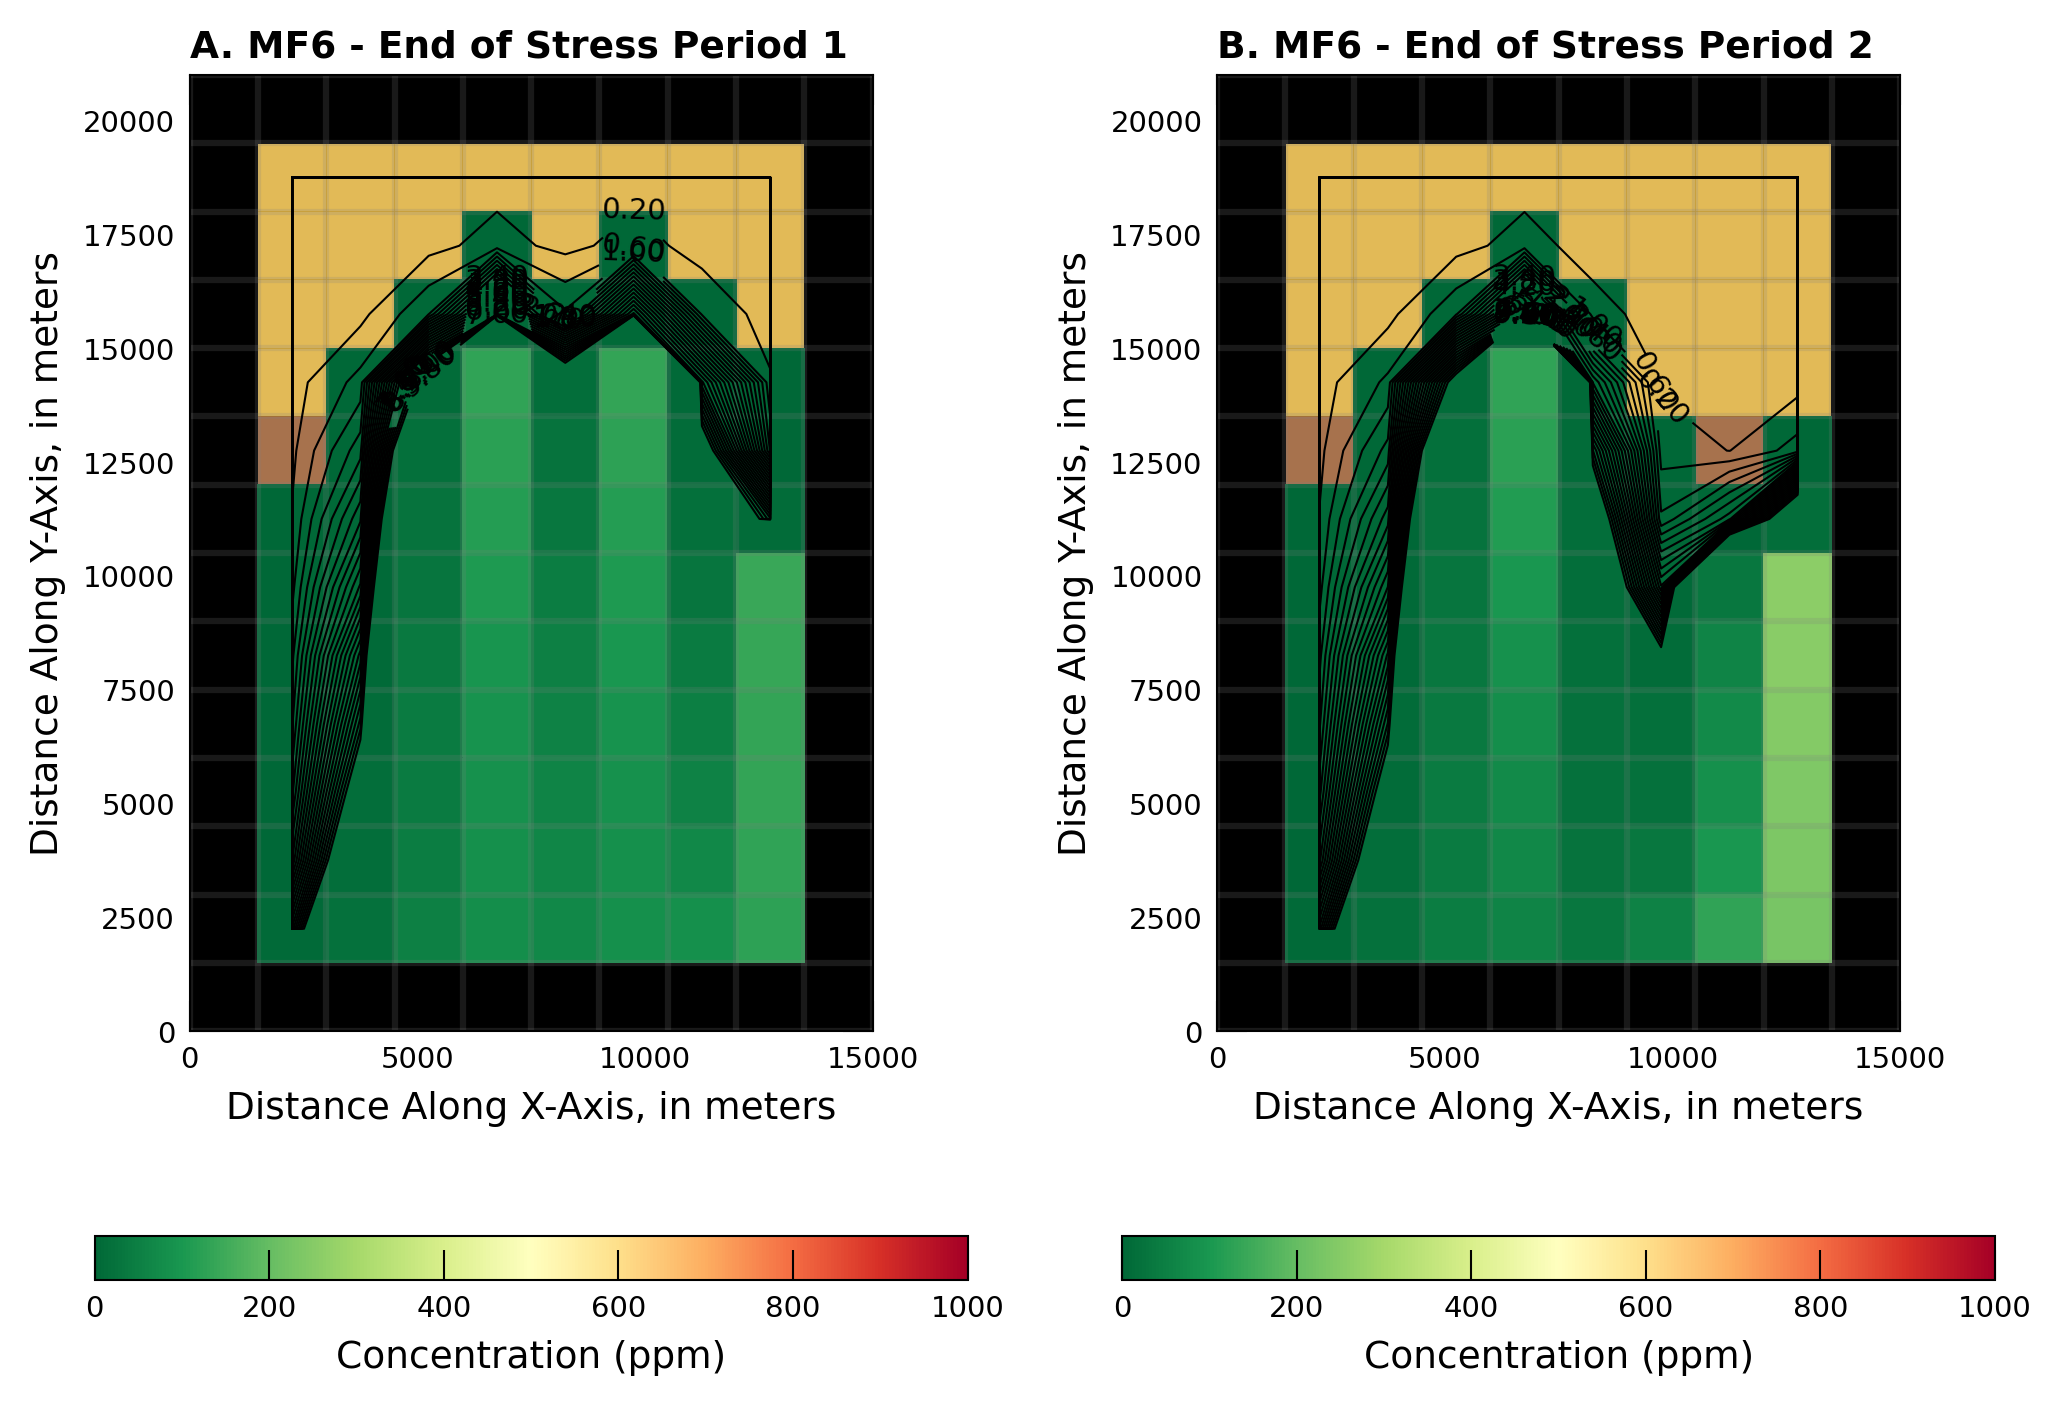

In [217]:
import copy
import matplotlib as mpl
# Figure properties
figure_size = (7, 5)
# Get the MF6 concentration output
gwt = sim.get_model(list(sim.model_names)[1])
ucnobj_mf6 = gwt.output.concentration()
conc_mf6 = ucnobj_mf6.get_alldata()


# Create figure for scenario
with styles.USGSPlot() as fs:
    sim_name = sim.name
    plt.rcParams["lines.dashed_pattern"] = [5.0, 5.0]
    levels = np.arange(0.2, 10, 0.4)
    stp_idx = 0  # 0-based (out of 2 possible stress periods)
# Plot after 8 years
    axWasNone = False
#    if ax is None:
    fig = plt.figure(figsize=figure_size, dpi=300, tight_layout=True)
    axWasNone = True
    ax = fig.add_subplot(1, 2, 1, aspect="equal")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0],  alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 0
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)
    
# second stress period
    stp_idx = 1  # 0-based (out of 2 possible stress periods)
    if axWasNone:
        ax = fig.add_subplot(1, 2, 2, aspect="equal",label = "subplot2")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0], alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 1
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)

In the figures above, the brown rectangle contained within the goldenrod rectangle represent two different horizontal hydraulic conductivities. The goldenrod color represents the conductivity of a medium grain material, $K_1 = 1.474\times 10^{-4}~\frac{m}{sec}$. The brown color represents theconductivity of a fine grain material, $K_2 = 1.474 \times 10^{-7}~\frac{m}{sec}$.

The plume "color map" is overlain on the material property map, and is set to opaque (not transparent).  The color ramp is and inverted GreenYellowRed.  High values render as red, lowest as green.

Extract concentrations for a specific location, first learn about the array

In [218]:
print("Shape:", conc_mf6.shape)  # (rows, columns, depth, etc.)
print("Data type:", conc_mf6.dtype)
print("Number of dimensions:", conc_mf6.ndim)

Shape: (2, 1, 14, 10)
Data type: float64
Number of dimensions: 4


My guess is there are two time components (dim0), 1 layer (dim1), and 14 rows (dim2), and 10 columns (dim3).

In [219]:
print("W1 Conc SP1",round(conc_mf6[0][0][11][5],3))
print("W1 Conc SP2",round(conc_mf6[1][0][11][5],3))
print("W2 Conc SP1",round(conc_mf6[0][0][11][7],3))
print("W2 Conc SP2",round(conc_mf6[1][0][11][7],3))
print("W3 Conc SP1",round(conc_mf6[0][0][11][8],3))
print("W3 Conc SP2",round(conc_mf6[1][0][11][8],3))

#print("I1 Conc SP1",round(conc_mf6[0][0][4][4],3))
#print("I1 Conc SP2",round(conc_mf6[1][0][4][4],3))
#print("I2 Conc SP1",round(conc_mf6[0][0][4][6],3))
#print("I2 Conc SP2",round(conc_mf6[1][0][4][6],3))
#print("I3 Conc SP1",round(conc_mf6[0][0][7][8],3))
#print("I3 Conc SP2",round(conc_mf6[1][0][7][8],3))
#$(0, 11, 5), qW1, cW1])  # Pumping well
#wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
#wellist_sp2.append([(0, 11, 8)

W1 Conc SP1 65.591
W1 Conc SP2 25.506
W2 Conc SP1 67.033
W2 Conc SP2 99.129
W3 Conc SP1 130.479
W3 Conc SP2 234.931


0. Title Page: Title of the Report; Author(s); Date; Affiliation/Institution

1. Introduction: Objective is to evaluate the feasibility of injecting tracer-labeled wastewater into the aquifer without exceeding water quality goals at drinking water wells. Injection must achieve a 4:1 dilution (250 mg/L threshold) at the production wells W-1, W-2, and W-3, starting from an injection concentration of 1000 mg/L.

2. Problem Statement: Evaluate injection scenarios at sites I-1, I-2, and I-3 considering:
  - Feasibility of injecting 30 cfs at I-3.
  - Potential for higher injection rates or alternative locations.
  - Maximum allowable injection volume meeting water quality goals (regulatory assimilative capacity).
  - Maximum waste load (mg/sec) at allowable injection rates.

3. Assumptions and Parameters: 
  - Aquifer Properties
  - Well Production Rates:
  - Tracer concentration: 
  - Water quality threshold: 


4. Modeling Methodology
  - Flow Calculations: Simulate groundwater velocity using Darcy’s Law and account for the influence of production wells.
  - Transport Modeling: Model advection, dispersion, and dilution to predict tracer concentrations at wells.
  - Dilution Criteria: Evaluate tracer concentrations at each production well to ensure $C_goal$ is met.

5. Results:
  - Scenario 1: Injection of 30 cfs at I-3. Tracer concentration at wells: W-1: [Concentration] mg/L ;W-2: [Concentration] mg/L; W-3: [Concentration] mg/L; Evaluation: [State whether 30 cfs injection meets the goal].
  - Scenario 2: Higher Injection Rates or Alternative Locations. Injection rate: [Maximum rate feasible for each site, I-1, I-2, I-3]. Evaluation: [State if higher injection rates meet the goal].
  - Scenario 3: Regulatory Assimilative Capacity. Maximum injection volume: [Calculated capacity in cfs or m³/s]. Comparison to well demand: [State if capacity exceeds current drinking water demand].
  - Scenario 4: Maximum Waste Load. Maximum injection rate: [Rate that satisfies water demand]. Waste load: [Calculated maximum mg/secmg/sec].

6. Discussion
  - Feasibility: Summarize the feasibility of injection scenarios.
  - Sensitivity Analysis: Discuss key parameters affecting the results (e.g., dispersivity, porosity).
  - Limitations: Highlight assumptions that could impact accuracy.

7. Recommendations
  - Proposed injection site(s) and rates.
  - Monitoring strategies to ensure compliance with water quality goals.
  - Consideration of alternative aquifer management strategies if goals cannot be met.

8. Conclusions
  - Summarize findings, including the maximum allowable injection volume and waste load.

9. Appendices
  - Appendix A: Detailed calculations (flow modeling, dilution ratios).
  - Appendix B: Maps/visualizations of flow and tracer concentration.
  - Appendix C: Tables of input parameters and results.